### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

#### Change train and test labels into one-hot vectors

In [38]:
#Number of categories present in the data
num_classes = len(np.unique(y_train))
print('Number of categories:',num_classes)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

Number of categories: 10


#### Build the Graph

#### Initialize model, reshape & normalize data

In [39]:
print('Number of samples' , len(x_train))
print('Number of labels ' , len(y_train))
print('Images Dimensions' , x_train[0].shape)
print('Label Dimensions' , y_train.shape)


img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0] , img_rows , img_cols , 1)
x_test = x_test.reshape(x_test.shape[0] , img_rows , img_cols , 1)

n_inputs = x_train.shape[1] * x_train.shape[2]

x_train = x_train.reshape( 60000, n_inputs) 
x_test = x_test.reshape( 10000, n_inputs)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape)
print(x_test.shape)

Number of samples 60000
Number of labels  60000
Images Dimensions (28, 28)
Label Dimensions (60000, 10)
(60000, 784)
(10000, 784)


#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model = Sequential()
model.add( Dense( units = 200, activation ='relu', input_shape= (n_inputs,)))
model.add( Dropout( 0.25)) 
model.add( Dense( units = 100, activation ='relu')) 
model.add( Dropout( 0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [32]:
model.add( Dense( units = num_classes, activation ='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fashion_train = model.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=10,batch_size=32)
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.5681 - acc: 0.7965 - val_loss: 0.4398 - val_acc: 0.8359
Epoch 2/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.4239 - acc: 0.8474 - val_loss: 0.4207 - val_acc: 0.8442
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.3923 - acc: 0.8568 - val_loss: 0.3753 - val_acc: 0.8623
Epoch 4/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.3669 - acc: 0.8651 - val_loss: 0.4107 - val_acc: 0.8507
Epoch 5/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.3518 - acc: 0.8710 - val_loss: 0.3645 - val_acc: 0.8680
Epoch 6/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.3408 - acc: 0.8746 - val_loss: 0.3538 - val_acc: 0.8735
Epoch 7/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.3301 - acc: 0.8780 - val_loss: 0.

In [33]:
test_eval = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 1s 51us/step
Test loss: 0.34137508542537687
Test accuracy: 0.8768


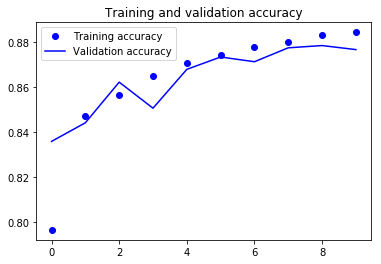

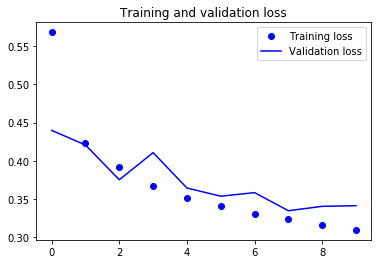

In [34]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()